In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
import os
os.chdir('/content/gdrive/My Drive/LabProject')

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Function to calculate statistics
def calculate_statistics(data):
    return {
        "mean": data.mean(),
        "median": data.median(),
        "q1": data.quantile(0.25),
        "q2": data.median(),  # Same as median
        "q3": data.quantile(0.75)
    }

# Carica i due file CSV
file1 = 'image/cholect_annotation/IoU/iou_mask_bbox.csv'
file2 = 'image/cholect_annotation/IoU/iou_center_pts_bbox.csv'
file3 = 'image/cholect_annotation/IoU/iou_three_pts_bbox.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

print(df1.columns)
print(df2.columns)
print(df3.columns)
df1

Index(['image', 'class', 'iou', 'is_similar'], dtype='object')
Index(['image', 'class', 'iou', 'is_similar'], dtype='object')
Index(['image', 'class', 'iou', 'is_similar'], dtype='object')


,image,class,iou,is_similar
0,seg8k_video12_015750,grasper,0.692157,True
1,seg8k_video12_015750,grasper,0.857686,True
2,seg8k_video12_015750,hook,0.918983,True
3,seg8k_video12_015765,grasper,0.735669,True
4,seg8k_video12_015765,grasper,0.905301,True
...,...,...,...,...
1325,t80_VID59_000922,grasper,0.967553,True
1326,t80_VID59_000922,grasper,0.956780,True
1327,t80_VID59_000930,grasper,0.830572,True
1328,t80_VID59_000990,grasper,0.988052,True


In [30]:
# Carica i due file CSV
file1_edgeSAM = 'image/cholect_annotation/IoU/bbox.csv'
file2_edgeSAM = 'image/cholect_annotation/IoU/centroid.csv'
file3_edgeSAM = 'image/cholect_annotation/IoU/three_points.csv'

df1_edgeSAM = pd.read_csv(file1_edgeSAM)
df2_edgeSAM = pd.read_csv(file2_edgeSAM)
df3_edgeSAM = pd.read_csv(file3_edgeSAM)

print(df1_edgeSAM.columns)
print(df2_edgeSAM.columns)
print(df3_edgeSAM.columns)
df1_edgeSAM

Index(['image', 'class', 'iou', 'is_similar'], dtype='object')
Index(['image', 'class', 'iou', 'is_similar'], dtype='object')
Index(['image', 'class', 'iou', 'is_similar'], dtype='object')


,image,class,iou,is_similar
0,seg8k_video12_015750.png,grasper,0.628898,True
1,seg8k_video12_015750.png,grasper,0.808269,True
2,seg8k_video12_015750.png,hook,0.753417,True
3,seg8k_video12_015765.png,grasper,0.717042,True
4,seg8k_video12_015765.png,grasper,0.873404,True
...,...,...,...,...
1325,t80_VID59_000922.png,grasper,0.964546,True
1326,t80_VID59_000922.png,grasper,0.972648,True
1327,t80_VID59_000930.png,grasper,0.978741,True
1328,t80_VID59_000990.png,grasper,0.974043,True


In [31]:
class_counts = df1["class"].value_counts()

print(class_counts)

class
grasper      896
hook         346
bipolar       33
irrigator     25
clipper       21
scissors       9
Name: count, dtype: int64


In [32]:
import seaborn as sns

# Function to plot and save boxplots with a specified order for the classes
def plot_and_save_boxplot(dataframe, title, filename):
    # Definire l'ordine desiderato delle classi
    class_order = ["grasper", "hook", "bipolar", "irrigator", "clipper", "scissors"]

    # Impostare la colonna 'class' come categoria con ordine specifico
    dataframe['class'] = pd.Categorical(dataframe['class'], categories=class_order, ordered=True)

    # Creare il boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x='class', y='iou', order=class_order)
    plt.title(title)
    plt.ylabel('IoU')
    plt.xlabel('Class')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()


# Plot and save each file
# plot_and_save_boxplot(df1, "Boxplot of IoU for Bounding Box prompt with SAM2", "boxplot_bounding_box_SAM2.png")
# plot_and_save_boxplot(df2, "Boxplot of IoU for Centroid prompt with SAM2", "boxplot_centroid_SAM2.png")
# plot_and_save_boxplot(df3, "Boxplot of IoU for Three Points prompt with SAM2", "boxplot_three_pts_SAM2.png")
# plot_and_save_boxplot(df1_edgeSAM, "Boxplot of IoU for Bounding Box prompt with EdgeSAM", "boxplot_bounding_box_edgeSAM.png")
# plot_and_save_boxplot(df2_edgeSAM, "Boxplot of IoU for Centroid prompt with EdgeSAM", "boxplot_centroid_edgeSAM.png")
# plot_and_save_boxplot(df3_edgeSAM, "Boxplot of IoU for Three Points prompt with EdgeSAM", "boxplot_three_pts_edgeSAM.png")

In [33]:
# Function to calculate overall statistics
def calculate_overall_statistics(dataframe, name):
    stats = dataframe['iou'].describe()
    # Calcolare il 25° e il 75° percentile
    Q1 = stats['25%']
    Q3 = stats['75%']
    # Calcolare l'IQR
    IQR = Q3 - Q1

    print(f"Overall Statistics for {name}:")
    print(stats)
    print(f"IQR: {IQR}\n")
    print("\n")
    return stats

# Function to calculate statistics by class
def calculate_statistics_by_class(dataframe, name):
    stats_by_class = dataframe.groupby('class')['iou'].describe()
    stats_by_class = stats_by_class.sort_values(by='count', ascending=False)
    print(f"Statistics by Class for {name}:")
    print(stats_by_class)
    print("\n")
    return stats_by_class

# Calculate and store statistics
print("### Overall Statistics ###")
stats1 = calculate_overall_statistics(df1, "Bounding Box prompt")
stats2 = calculate_overall_statistics(df2, "Center Points prompt")
stats3 = calculate_overall_statistics(df3, "Three Points prompt")

print("### Statistics by Class ###")
class_stats1 = calculate_statistics_by_class(df1, "Bounding Box prompt")
class_stats2 = calculate_statistics_by_class(df2, "Center Points prompt")
class_stats3 = calculate_statistics_by_class(df3, "Three Points prompt")

# Compare the means for all datasets
print("### Comparison of Means ###")
print(f"Mean IoU for Bounding Box prompt: {stats1['mean']}")
print(f"Mean IoU for Center Points prompt: {stats2['mean']}")
print(f"Mean IoU for Three Points prompt: {stats3['mean']}")

### Overall Statistics ###
Overall Statistics for Bounding Box prompt:
count    1330.000000
mean        0.902149
std         0.098061
min         0.326271
25%         0.875174
50%         0.937306
75%         0.964543
max         0.990757
Name: iou, dtype: float64
IQR: 0.08936870098114014



Overall Statistics for Center Points prompt:
count    1330.000000
mean        0.825717
std         0.228733
min         0.000000
25%         0.809975
50%         0.921553
75%         0.959494
max         0.990632
Name: iou, dtype: float64
IQR: 0.14951911568641663



Overall Statistics for Three Points prompt:
count    1330.000000
mean        0.840742
std         0.187617
min         0.000408
25%         0.808753
50%         0.909792
75%         0.955386
max         0.988839
Name: iou, dtype: float64
IQR: 0.1466328650712967



### Statistics by Class ###
Statistics by Class for Bounding Box prompt:
           count      mean       std       min       25%       50%       75%  \
class                 

In [34]:
# Calculate and store statistics
print("### Overall Statistics ###")
stats1 = calculate_overall_statistics(df1_edgeSAM, "Bounding Box prompt")
stats2 = calculate_overall_statistics(df2_edgeSAM, "Center Points prompt")
stats3 = calculate_overall_statistics(df3_edgeSAM, "Three Points prompt")

print("### Statistics by Class ###")
class_stats1 = calculate_statistics_by_class(df1_edgeSAM, "Bounding Box prompt")
class_stats2 = calculate_statistics_by_class(df2_edgeSAM, "Center Points prompt")
class_stats3 = calculate_statistics_by_class(df3_edgeSAM, "Three Points prompt")

# Compare the means for all datasets
print("### Comparison of Means ###")
print(f"Mean IoU for Bounding Box prompt: {stats1['mean']}")
print(f"Mean IoU for Center Points prompt: {stats2['mean']}")
print(f"Mean IoU for Three Points prompt: {stats3['mean']}")

### Overall Statistics ###
Overall Statistics for Bounding Box prompt:
count    1330.000000
mean        0.875999
std         0.118317
min         0.251969
25%         0.841777
50%         0.917331
75%         0.958610
max         0.990589
Name: iou, dtype: float64
IQR: 0.11683277785778046



Overall Statistics for Center Points prompt:
count    1330.000000
mean        0.692806
std         0.287519
min         0.000000
25%         0.555091
50%         0.814863
75%         0.906733
max         0.987574
Name: iou, dtype: float64
IQR: 0.3516419231891632



Overall Statistics for Three Points prompt:
count    1330.000000
mean        0.780581
std         0.201686
min         0.002069
25%         0.708920
50%         0.853689
75%         0.926156
max         0.987233
Name: iou, dtype: float64
IQR: 0.21723583340644848



### Statistics by Class ###
Statistics by Class for Bounding Box prompt:
           count      mean       std       min       25%       50%       75%  \
class                 

In [35]:
# Example: Extracting IoU values from the first dataset
iou1 = df1['iou']  # Replace 'IoU' with the actual column name
iou2 = df2['iou']  # Replace 'IoU' with the actual column name
iou3 = df3['iou']  # Replace 'IoU' with the actual column name

# Extract IoU values from the second set of data (edgeSAM method)
iou1_edgeSAM = df1_edgeSAM['iou']  # Replace 'IoU' with the actual column name
iou2_edgeSAM = df2_edgeSAM['iou']  # Replace 'IoU' with the actual column name
iou3_edgeSAM = df3_edgeSAM['iou']  # Replace 'IoU' with the actual column name

<ipython-input-36-201e302c434e>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = plt.boxplot(iou_values_SAM2, positions=positions_SAM2, patch_artist=True, widths=0.6, labels=[''] * 3)
<ipython-input-36-201e302c434e>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = plt.boxplot(iou_values_edgeSAM, positions=positions_edgeSAM, patch_artist=True, widths=0.6, labels=[''] * 3)


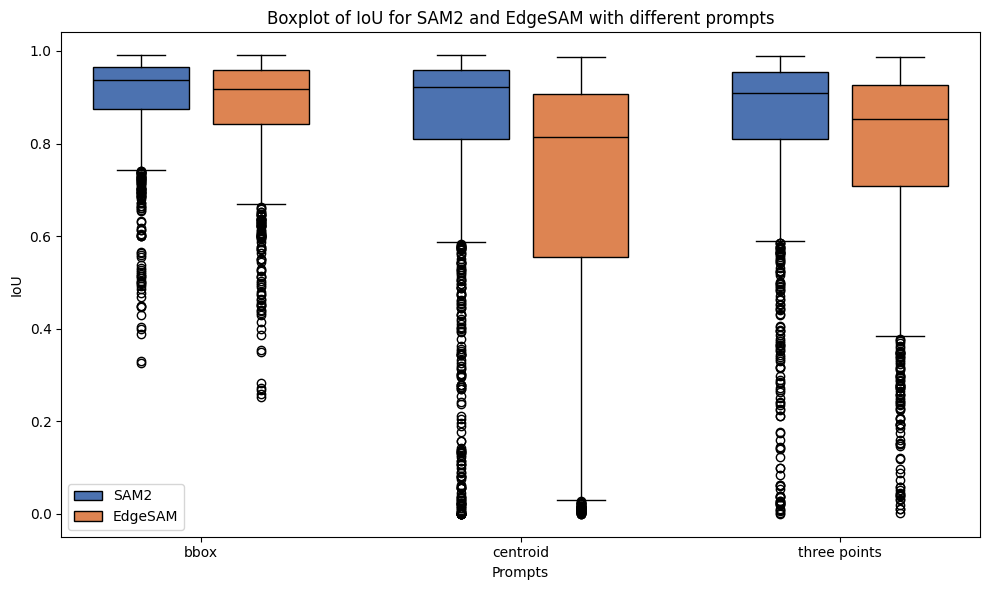

In [36]:
# Combine all IoU values into a single list
iou_values_SAM2 = [iou1, iou2, iou3]
iou_values_edgeSAM = [iou1_edgeSAM, iou2_edgeSAM, iou3_edgeSAM]

# Define the positions for paired boxplots
positions_SAM2 = [1, 3, 5]  # Positions for SAM2
positions_edgeSAM = [1.75, 3.75, 5.75]  # Positions for EdgeSAM

# Define labels for the paired groups
labels = ['bbox', 'centroid', 'three points']

# Create the box plot
plt.figure(figsize=(10, 6))

# Plot SAM2 IoU values
box1 = plt.boxplot(iou_values_SAM2, positions=positions_SAM2, patch_artist=True, widths=0.6, labels=[''] * 3)
# Plot EdgeSAM IoU values
box2 = plt.boxplot(iou_values_edgeSAM, positions=positions_edgeSAM, patch_artist=True, widths=0.6, labels=[''] * 3)

# Apply colors to each group using the "deep" palette
colors = sns.color_palette("deep")  # Get the colors from the deep palette
for patch in box1['boxes']:
    patch.set_facecolor(colors[0])  # Blue for SAM2
for patch in box2['boxes']:
    patch.set_facecolor(colors[1])  # Orange for EdgeSAM

# Personalizzare la linea nera (mediana) nei boxplot
for median in box1['medians']:
    median.set(color="black")  # Colore nero e larghezza della linea
for median in box2['medians']:
    median.set(color="black")

# Add labels and adjust axis
plt.xticks([(p1 + p2) / 2 for p1, p2 in zip(positions_SAM2, positions_edgeSAM)], labels)
plt.title('Boxplot of IoU for SAM2 and EdgeSAM with different prompts')
plt.ylabel('IoU')
plt.xlabel('Prompts')
plt.legend([box1["boxes"][0], box2["boxes"][0]], ['SAM2', 'EdgeSAM'], loc='lower left')
plt.tight_layout()

# Save and show the plot
plt.savefig("boxplot_SAM2_EdgeSAM.png")
plt.show()

In [37]:
def plot_and_save_paired_boxplot(dataframe1, dataframe2, title, filename):
    # Definire l'ordine desiderato delle classi
    class_order = ["grasper", "hook", "bipolar", "irrigator", "clipper", "scissors"]

    # Impostare la colonna 'class' come categoria con ordine specifico per entrambi i dataframe
    dataframe1['class'] = pd.Categorical(dataframe1['class'], categories=class_order, ordered=True)
    dataframe2['class'] = pd.Categorical(dataframe2['class'], categories=class_order, ordered=True)

    # Aggiungere una colonna per distinguere i due metodi
    dataframe1['method'] = 'SAM2'
    dataframe2['method'] = 'EdgeSAM'

    # Concatenare i due dataframe
    combined_dataframe = pd.concat([dataframe1, dataframe2])

    # Creare il boxplot accoppiato
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_dataframe, x='class', y='iou', hue='method', order=class_order)
    plt.title(title)
    plt.ylabel('IoU')
    plt.xlabel('Class')
    plt.legend(title='Method')
    plt.tight_layout()

    # Salvare il grafico
    plt.savefig(filename)
    plt.close()

# Esempio di utilizzo della funzione
plot_and_save_paired_boxplot(df1, df1_edgeSAM, "Comparison of IoU for SAM2 and EdgeSAM with bounding box prompt", "paired_boxplot_bbox.png")

In [38]:
# Calcola la media dell'IOU per ogni immagine in df1
mean_iou_df1 = df1.groupby('image')['iou'].mean().reset_index()
mean_iou_df1.rename(columns={'iou': 'mean_iou_df1'}, inplace=True)

# Calcola la media dell'IOU per ogni immagine in df2
mean_iou_df2 = df2.groupby('image')['iou'].mean().reset_index()
mean_iou_df2.rename(columns={'iou': 'mean_iou_df2'}, inplace=True)

# Calcola la media dell'IOU per ogni immagine in df3
mean_iou_df3 = df3.groupby('image')['iou'].mean().reset_index()
mean_iou_df3.rename(columns={'iou': 'mean_iou_df3'}, inplace=True)

mean_iou_df1

,image,mean_iou_df1
0,seg8k_video12_015750,0.822942
1,seg8k_video12_015765,0.867799
2,seg8k_video12_015780,0.885281
3,seg8k_video12_015795,0.858909
4,seg8k_video12_015810,0.892559
...,...,...
742,t80_VID59_000900,0.947127
743,t80_VID59_000922,0.962166
744,t80_VID59_000930,0.830572
745,t80_VID59_000990,0.988052


In [39]:
# Calcola la media dell'IOU per ogni immagine in df1
mean_iou_df1_edgeSAM = df1_edgeSAM.groupby('image')['iou'].mean().reset_index()
mean_iou_df1_edgeSAM.rename(columns={'iou': 'mean_iou_df1'}, inplace=True)

# Calcola la media dell'IOU per ogni immagine in df2
mean_iou_df2_edgeSAM = df2_edgeSAM.groupby('image')['iou'].mean().reset_index()
mean_iou_df2_edgeSAM.rename(columns={'iou': 'mean_iou_df2'}, inplace=True)

# Calcola la media dell'IOU per ogni immagine in df3
mean_iou_df3_edgeSAM = df3_edgeSAM.groupby('image')['iou'].mean().reset_index()
mean_iou_df3_edgeSAM.rename(columns={'iou': 'mean_iou_df3'}, inplace=True)

mean_iou_df1_edgeSAM

,image,mean_iou_df1
0,seg8k_video12_015750.png,0.730195
1,seg8k_video12_015765.png,0.842078
2,seg8k_video12_015780.png,0.843369
3,seg8k_video12_015795.png,0.746239
4,seg8k_video12_015810.png,0.834094
...,...,...
742,t80_VID59_000900.png,0.926402
743,t80_VID59_000922.png,0.968597
744,t80_VID59_000930.png,0.978741
745,t80_VID59_000990.png,0.974043


In [40]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(mean_iou_df1.mean_iou_df1, mean_iou_df1_edgeSAM.mean_iou_df1)
print("Bbox: Statistic:", stat, "P-value:", p_value)
stat, p_value = wilcoxon(mean_iou_df2.mean_iou_df2, mean_iou_df2_edgeSAM.mean_iou_df2)
print("Centroid: Statistic:", stat, "P-value:", p_value)
stat, p_value = wilcoxon(mean_iou_df3.mean_iou_df3, mean_iou_df3_edgeSAM.mean_iou_df3)
print("Three pts: Statistic:", stat, "P-value:", p_value)

Bbox: Statistic: 59314.0 P-value: 2.8953990026031134e-42
Centroid: Statistic: 33007.0 P-value: 4.355995817895454e-73
Three pts: Statistic: 55405.0 P-value: 2.6647995534964024e-46
